# Erasmus Neural Networks
http://michalbereta.pl/nn
## One layer of perceptrons for multiclass classification problems


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### The example classification problem with three classes

We are going to use very simple classification problem with three classes, all of them linearly separable from each other.

Load the data from file `data_3classes_linear.txt`

The last column contains class labels, endoced as `0`, `1`, and `2`.

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


data = np.loadtxt('data_3classes_linear.txt')
print('data=',data)

d = data[:,-1].astype('int')
X = data[:,:-1]

print()
print('X=',X)
print()
print('d=',d)

data= [[0.716 0.896 0.   ]
 [0.624 0.834 0.   ]
 [0.732 0.804 0.   ]
 [0.702 0.862 0.   ]
 [0.656 0.794 0.   ]
 [0.784 0.8   0.   ]
 [0.778 0.858 0.   ]
 [0.664 0.894 0.   ]
 [0.678 0.828 0.   ]
 [0.706 0.76  0.   ]
 [0.744 0.34  1.   ]
 [0.68  0.302 1.   ]
 [0.758 0.27  1.   ]
 [0.684 0.246 1.   ]
 [0.732 0.292 1.   ]
 [0.724 0.238 1.   ]
 [0.836 0.254 1.   ]
 [0.796 0.334 1.   ]
 [0.782 0.236 1.   ]
 [0.814 0.284 1.   ]
 [0.166 0.504 2.   ]
 [0.118 0.466 2.   ]
 [0.142 0.424 2.   ]
 [0.176 0.428 2.   ]
 [0.21  0.468 2.   ]
 [0.2   0.418 2.   ]
 [0.146 0.372 2.   ]
 [0.112 0.42  2.   ]
 [0.16  0.466 2.   ]
 [0.132 0.51  2.   ]]

X= [[0.716 0.896]
 [0.624 0.834]
 [0.732 0.804]
 [0.702 0.862]
 [0.656 0.794]
 [0.784 0.8  ]
 [0.778 0.858]
 [0.664 0.894]
 [0.678 0.828]
 [0.706 0.76 ]
 [0.744 0.34 ]
 [0.68  0.302]
 [0.758 0.27 ]
 [0.684 0.246]
 [0.732 0.292]
 [0.724 0.238]
 [0.836 0.254]
 [0.796 0.334]
 [0.782 0.236]
 [0.814 0.284]
 [0.166 0.504]
 [0.118 0.466]
 [0.142 0.424]
 [0.176 0.428]

### Data visualization

Check, that the classes can be separated with linear functions.

In [4]:
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')



<IPython.core.display.Javascript object>

### Combining perceptrons in a layer

Each perceptron is responsible for just one class. When making the clasification decision, we check for the strongest response from among the neurons.

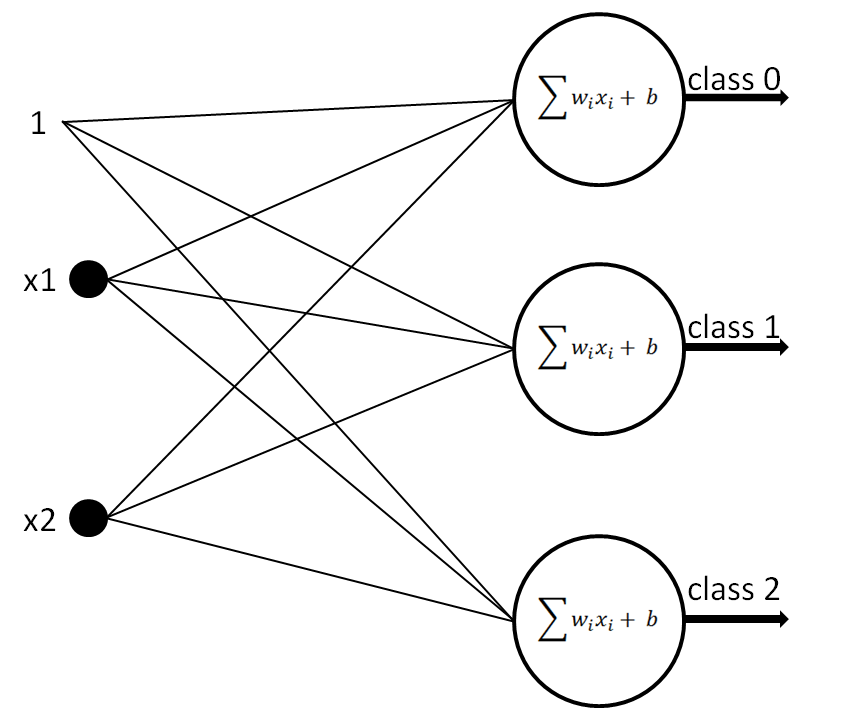

We will implement out layer of perceptrons as a class in Python.

All of the weights of all neurons are stored in one matrix, (one column for each neuron).

Biases are stored separately in a vector.

In [5]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None


#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

w= [[-0.81129362 -0.52427405 -0.19975616]
 [-0.81407214  0.1423525  -0.33743159]
 [ 0.35555596  0.38131201 -0.94400733]
 [-0.36031312  0.82077974 -0.09449609]
 [-0.7674471  -0.24706138 -0.4612777 ]]
b= [0. 0. 0.]


### Forward pass

Let's add the possibility to calculate the response of the neurons.

In [6]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs


#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)    

#example random data with 10 examples
X = np.random.rand(10, num_of_ins)
print('X=',X)
Y = perc.Forward(X)
print('Y=',Y)

X= [[0.9173487  0.59425318 0.51619008 0.01990408 0.81303571]
 [0.63239011 0.23292259 0.14854317 0.71695986 0.15753291]
 [0.82061391 0.49675713 0.0358054  0.31871439 0.2173832 ]
 [0.92210519 0.83834105 0.61729142 0.1887483  0.99351518]
 [0.92690312 0.87691423 0.08486751 0.10326069 0.797878  ]
 [0.27055753 0.01473124 0.83099537 0.98831587 0.25859697]
 [0.46477225 0.42385892 0.81237611 0.52979125 0.99622318]
 [0.88194809 0.03702783 0.26608388 0.9952163  0.52513511]
 [0.38090764 0.2085882  0.45181958 0.32206407 0.94242575]
 [0.17388346 0.45562186 0.15454181 0.045222   0.81813928]]
Y= [[-0.15475656 -0.12354283  0.49332014]
 [ 0.81196109  0.04708358  0.21602298]
 [ 0.60300553 -0.19751908  0.31131181]
 [-0.06793954 -0.0764947   0.47671835]
 [ 0.08099626 -0.11794333  0.21874901]
 [ 0.69379959  0.23881987  0.39188939]
 [-0.13917024  0.304984    0.27573039]
 [ 0.70819114  0.35592034  0.17228025]
 [-0.38505704  0.3945325   0.02696659]
 [-0.46250166  0.24564825 -0.13936068]]


### Making predictions about the classes

Matrix `Y` contains in each row the responses of the neurons for a given example (row in `X`).

To make the classification decision, we have to select in each row, which column indicates the strongest response (biggest value).

In [7]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)

#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)    

#example random data with 10 examples
X = np.random.rand(10, num_of_ins)
print('X=',X)
Y = perc.Forward(X)
print('Y=',Y)

predicted_classes = perc.GetPredictions()
print('predicted_classes',predicted_classes)

X= [[6.48341503e-01 3.71089644e-01 5.01056926e-01 2.10748783e-01
  8.63285468e-01]
 [7.30050979e-01 4.41308278e-03 3.90651138e-01 8.16040783e-01
  6.46211564e-01]
 [6.81132590e-01 1.12764605e-01 5.09040967e-01 9.44878465e-01
  5.53493562e-01]
 [4.20191063e-01 6.24832760e-01 8.15141271e-01 7.64459469e-01
  2.79557451e-01]
 [4.33180660e-01 6.52442770e-01 2.37491110e-01 7.58538301e-01
  3.93553592e-01]
 [8.97323191e-01 9.90375396e-01 6.95647102e-01 1.79287783e-04
  2.39357000e-01]
 [6.07646497e-01 2.68778118e-01 6.33939031e-01 9.56137574e-01
  1.95088958e-01]
 [6.52865986e-02 5.61725744e-01 2.62908860e-01 9.16308764e-01
  2.38168261e-01]
 [8.04590221e-01 2.50020213e-01 8.59577931e-01 9.26090942e-01
  5.77578827e-01]
 [8.06160510e-01 5.02520420e-02 5.36286429e-01 2.99068899e-01
  3.63043434e-01]]
Y= [[ 0.51709403 -0.39682663 -0.44103856]
 [ 1.17632799 -0.57231761  0.21147447]
 [ 1.03025315 -0.82592739  0.27659319]
 [ 0.04717211 -1.35924649 -0.02769842]
 [ 0.49880802 -0.74184412 -0.1636839 

### Measuring the MSE and classification error

We can measure both, MSE (mean squared error) and the classification error.

In [8]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())

### Getting ready for training

We can implement both, matrix pseudo-inverse and iterative version of the MSE minimization.

In [9]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        pass
    def TrainIterative(self, X, d, labels, eta, max_iters): #iterative; we pass 'labels' just to monitor the clasification error during training
        pass

### Encoding class labels as `1` and `-1`

Each perceptron is trained against all others. For that, each neruon should have its own column of required output values for the examples. They could be just `1` for examples from the class represented by the given neuron, and `-1` for examples from all other classes.

Check the following helper function.

In [10]:
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

X = np.loadtxt('data_3classes_linear.txt')
d = X[:,-1].astype('int')
X = X[:,:-1]

num_of_cls = len(set(d))
print('d=',d)
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain=',dtrain)

d= [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
dtrain= [[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]]


### Initial responses and errors

Let's create neurons with random weights and check the errors.

In [11]:
num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

perc = MCPerceptron(num_of_cls, num_of_ins)
print('Initial weights:')
print('w=',perc.w)
print('b=',perc.b)

Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))

num_of_cls= 3
num_of_ins= 2
Initial weights:
w= [[ 0.7514212   0.67992019 -0.15470491]
 [ 0.04607409 -0.85254929  0.64727039]]
b= [0. 0. 0.]
Y= [[ 0.57929996 -0.27706131  0.46918556]
 [ 0.50731262 -0.28675591  0.44328764]
 [ 0.58708389 -0.18774805  0.4071614 ]
 [ 0.56721355 -0.25759351  0.44934423]
 [ 0.52951513 -0.23089649  0.41244627]
 [ 0.62597349 -0.148982    0.39652767]
 [ 0.62413726 -0.20250938  0.43499758]
 [ 0.54013391 -0.31071206  0.47593567]
 [ 0.54761292 -0.24492492  0.43104996]
 [ 0.56551967 -0.1679138   0.38270383]
 [ 0.57472256  0.21599386  0.10497148]
 [ 0.52488079  0.20487584  0.09027632]
 [ 0.58201727  0.2851912   0.05749668]
 [ 0.52530633  0.25533829  0.05341036]
 [ 0.56349395  0.24875719  0.07575896]
 [ 0.55499458  0.28935549  0.042044  ]
 [ 0.63989094  0.35186576  0.03507337]
 [ 0.61352002  0.25646501  0.0930432 ]
 [ 0.59848486  0.33049596  0.03177657]
 [ 0.6247419   0.31133104  0.05789499]
 [ 0.14795726 -0.31681809  0.30054326]
 [ 0.11013823 -0.31705739  0.28337282

### Training with matrix pseudo-inverse

In [12]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X)) #add te column wit '1's
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainIterative(self, X, d, labels, eta, max_iters):
        pass


perc = MCPerceptron(num_of_cls, num_of_ins) #create new perceptron, as the class definition changed    
perc.Train(X, dtrain)

#checking the responses after training
Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

Y= [[ 1.20532085 -1.15703431 -1.04828654]
 [ 0.88706798 -1.16612664 -0.72094134]
 [ 0.88992947 -0.81801923 -1.07191023]
 [ 1.06828365 -1.07777068 -0.99051297]
 [ 0.77569719 -0.96084638 -0.81485081]
 [ 0.92898062 -0.68470092 -1.2442797 ]
 [ 1.13201754 -0.88898173 -1.24303581]
 [ 1.14462753 -1.27065471 -0.87397282]
 [ 0.92096197 -1.0216198  -0.89934217]
 [ 0.70448062 -0.73366106 -0.97081956]
 [-0.77139     0.73302132 -0.96163132]
 [-0.97427768  0.70985308 -0.7355754 ]
 [-1.00948367  0.99518817 -0.9857045 ]
 [-1.17215744  0.90294537 -0.73078793]
 [-0.95686869  0.86286931 -0.90600061]
 [-1.15987577  1.02166031 -0.86178454]
 [-0.98697722  1.22799549 -1.24101827]
 [-0.7395529   0.8729056  -1.1333527 ]
 [-1.10743987  1.16228031 -1.05484043]
 [-0.90139223  1.07865785 -1.17726562]
 [-0.77428005 -1.141306    0.91558605]
 [-0.96071258 -1.12749382  1.0882064 ]
 [-1.087525   -0.9341378   1.0216628 ]
 [-1.03812968 -0.86868635  0.90681603]
 [-0.85888136 -0.92142237  0.78030373]
 [-1.04951722 -0.78038

### Full code with vizualization

X= [[0.716 0.896]
 [0.624 0.834]
 [0.732 0.804]
 [0.702 0.862]
 [0.656 0.794]
 [0.784 0.8  ]
 [0.778 0.858]
 [0.664 0.894]
 [0.678 0.828]
 [0.706 0.76 ]
 [0.744 0.34 ]
 [0.68  0.302]
 [0.758 0.27 ]
 [0.684 0.246]
 [0.732 0.292]
 [0.724 0.238]
 [0.836 0.254]
 [0.796 0.334]
 [0.782 0.236]
 [0.814 0.284]
 [0.166 0.504]
 [0.118 0.466]
 [0.142 0.424]
 [0.176 0.428]
 [0.21  0.468]
 [0.2   0.418]
 [0.146 0.372]
 [0.112 0.42 ]
 [0.16  0.466]
 [0.132 0.51 ]]
d= [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
num_of_cls= 3
num_of_ins= 2
dtrain= [[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1. 

<IPython.core.display.Javascript object>


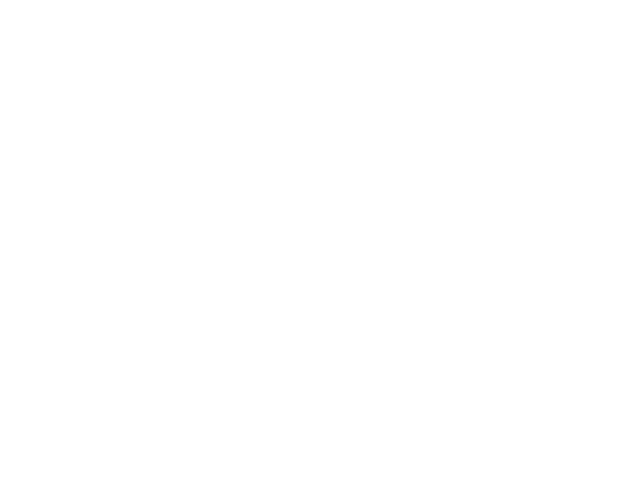

Y= [[ 1.20532085 -1.15703431 -1.04828654]
 [ 0.88706798 -1.16612664 -0.72094134]
 [ 0.88992947 -0.81801923 -1.07191023]
 [ 1.06828365 -1.07777068 -0.99051297]
 [ 0.77569719 -0.96084638 -0.81485081]
 [ 0.92898062 -0.68470092 -1.2442797 ]
 [ 1.13201754 -0.88898173 -1.24303581]
 [ 1.14462753 -1.27065471 -0.87397282]
 [ 0.92096197 -1.0216198  -0.89934217]
 [ 0.70448062 -0.73366106 -0.97081956]
 [-0.77139     0.73302132 -0.96163132]
 [-0.97427768  0.70985308 -0.7355754 ]
 [-1.00948367  0.99518817 -0.9857045 ]
 [-1.17215744  0.90294537 -0.73078793]
 [-0.95686869  0.86286931 -0.90600061]
 [-1.15987577  1.02166031 -0.86178454]
 [-0.98697722  1.22799549 -1.24101827]
 [-0.7395529   0.8729056  -1.1333527 ]
 [-1.10743987  1.16228031 -1.05484043]
 [-0.90139223  1.07865785 -1.17726562]
 [-0.77428005 -1.141306    0.91558605]
 [-0.96071258 -1.12749382  1.0882064 ]
 [-1.087525   -0.9341378   1.0216628 ]
 [-1.03812968 -0.86868635  0.90681603]
 [-0.85888136 -0.92142237  0.78030373]
 [-1.04951722 -0.78038

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

##########################################################################
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainIterative(self, X, d, labels, eta, max_iters):
        pass
##########################################################################
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

##########################################################################
#load data
##########################################################################
X = np.loadtxt('data_3classes_linear.txt')
#print('X=',X)
d = X[:,-1].astype('int')
X = X[:,:-1]
print('X=',X)
print('d=',d)

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

##########################################################################
#encode classes
##########################################################################
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain=',dtrain)

##########################################################################
#create perceptron
##########################################################################
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#check initial responses and errors
##########################################################################
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))


##########################################################################
#vizualization of the initial responses
##########################################################################
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

Z0 = _X*perc.w[0,0] + _Y*perc.w[1,0] + perc.b[0]
Z1 = _X*perc.w[0,1] + _Y*perc.w[1,1] + perc.b[1]
Z2 = _X*perc.w[0,2] + _Y*perc.w[1,2] + perc.b[2]
Z = Z0.copy()
Z[(Z0>Z1) * (Z0>Z2)] = 0
Z[(Z1>Z0) * (Z1>Z2)] = 100
Z[(Z2>Z0) * (Z2>Z1)] = 200

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('random weights')
plt.show()


##########################################################################
#training
##########################################################################
plt.figure()
perc.Train(X, dtrain)

Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#vizualization of the trained neurons
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

Z0 = _X*perc.w[0,0] + _Y*perc.w[1,0] + perc.b[0]
Z1 = _X*perc.w[0,1] + _Y*perc.w[1,1] + perc.b[1]
Z2 = _X*perc.w[0,2] + _Y*perc.w[1,2] + perc.b[2]
Z = Z0.copy()
Z[(Z0>Z1) * (Z0>Z2)] = 0
Z[(Z1>Z0) * (Z1>Z2)] = 100
Z[(Z2>Z0) * (Z2>Z1)] = 200

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('matrix pseudo-inverse')
plt.show()
##########################################################################

### Iterative learning

We can train our network iteratively, based on the negative gradient.

If `MSE` is defined as 

\begin{equation}
MSE = (d - Xw)^T(d-Xw)
\end{equation}

then, the gradient for `w` is

\begin{equation}
-2X^T(d-Xw)
\end{equation}

and the update formula for weights is 

\begin{equation}
w = w + \eta  X^T(d-Xw)
\end{equation}

Check the implementation below.

mse= 1.5640126024137417
classification_error= 16

mse= 1.4543081848901245
classification_error= 10

mse= 1.3756337128978116
classification_error= 0

mse= 1.2835075551835007
classification_error= 3

mse= 1.2131017215134308
classification_error= 0

mse= 1.1356537205644552
classification_error= 0

mse= 1.0727061864823015
classification_error= 0

mse= 1.0075080023015335
classification_error= 0

mse= 0.9513268158404338
classification_error= 0

mse= 0.8963526540854041
classification_error= 0

mse= 0.8463341810613365
classification_error= 0

mse= 0.7998988761304731
classification_error= 0

mse= 0.7555072257748983
classification_error= 0

mse= 0.7162120511701959
classification_error= 0

mse= 0.6769643853862721
classification_error= 0

mse= 0.6436505957381335
classification_error= 0

mse= 0.6091057750665385
classification_error= 0

mse= 0.5808154613944229
classification_error= 0

mse= 0.5505645358938398
classification_error= 0

mse= 0.5265079208412659
classification_error= 0

mse= 0.50016606821

<IPython.core.display.Javascript object>


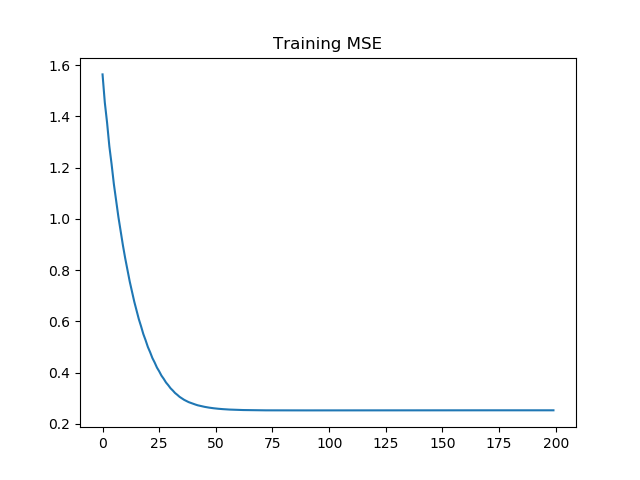

Text(0.5, 1.0, 'Training MSE')

In [14]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        print('w=',w)
        self.w = w[1:,:]
        self.b = w[0,:]
        print('w=',self.w)
        print('b=',self.b)
    def TrainIterative(self, X, d, labels, eta, max_iters):
        self.mse_stats = []
        Y = self.Forward(X)
        for i in range(max_iters):
            self.w += eta*np.dot(X.T, d - self.outs)
            self.b += eta*np.dot(np.ones((1,X.shape[0])), d - self.outs).flatten()
            Y = self.Forward(X)
            mse = self.GetMSE(d)
            self.mse_stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()
###########################################################################################################
perc2 = MCPerceptron(num_of_cls, num_of_ins)
perc2.TrainIterative(X, dtrain, d, 0.04, 200)
Y = perc2.Forward(X)
#print('Y=',Y)
predictions = perc2.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc2.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc2.w)
print('b=',perc2.b)
print()
print('Weights from matrix pseudo-inverse:') # just for comparison
print('w=',perc.w)
print('b=',perc.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

### Task 1

Train the proper percepton on the `iris` dataset.

- Endode the class labels correctly.

- Display the errors (MSE and classification error) before training and after the training. Comment on the results.

- Compare the matrix pseudo-inverse and iterative version.

- Try to tune the `eta` parameter of the iterative algorithm.

- Are the classes linearly separable (what you think? some of them?)

- What are the min/max values of the inputs? Try to normalize the data. Does it help?

Write your code and comments.

YOUR ANSWER HERE (COMMENTS)

#### Encode the class labels correctly.

In [15]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

##########################################################################
#load data
##########################################################################
X = np.loadtxt('iris.csv', dtype = "float", delimiter=None, usecols=[0,1,2,3])
d = np.loadtxt('iris.csv', dtype = "U20", delimiter=None, usecols=[4])
#print('X=',X)
print('d =', d)

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

#print('num_of_cls=',num_of_cls)
#print('num_of_ins=',num_of_ins)

##########################################################################
for i in range(len(d)):
    if d[i]=='Iris-setosa':
        d[i] = 0
    elif d[i]=='Iris-versicolor':
        d[i] = 1
    elif d[i]=='Iris-virginica':
        d[i] = 2
        
d = d.astype(int)
print('d =', d)

##########################################################################
#encode classes
##########################################################################
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain =', dtrain)


d = ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

#### Display the errors (MSE and classification error) before training and after the training. Comment on the results.

In [20]:
##########################################################################
#create perceptron
##########################################################################
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#normalize
##########################################################################
min = X.min(axis=0)
max = X.max(axis=0)
X = X / X.max(axis=0)

##########################################################################
#check initial responses and errors
##########################################################################
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))

##########################################################################
#training
##########################################################################
perc.Train(X, dtrain)
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)


w= [[-0.53392217 -0.54232498 -0.90513492]
 [ 0.41858183  0.1064996  -0.32756856]
 [ 0.89139127  0.42917644 -0.09202997]
 [ 0.94066248  0.87822267  0.85069039]]
b= [0. 0. 0.]
Predictions= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
MSE= 2.1479940024289506
classification errors= 100
w= [[-0.75506092  2.12595385 -2.37089293]
 [ 1.0371602  -0.34040529 -0.69675492]
 [ 2.13376242 -3.87820892  1.74444649]
 [-3.07410698  3.0155949   0.05851209]
 [-0.31675706 -2.41595647  2.73271353]]
w= [[ 1.0371602  -0.34040529 -0.69675492]
 [ 2.13376242 -3.87820892  1.74444649]
 [-3.07410698  3.0155949   0.05851209]
 [-0.31675706 -2.41595647  2.73271353]]
b= [-0.75506092  2.12595385 -2.37089293]
Predictions= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#### Compare the matrix pseudo-inverse and iterative version.

mse= 1.881388747107691
classification_error= 127

mse= 1.795861142195833
classification_error= 150

mse= 1.7016636481496816
classification_error= 137

mse= 1.640489807020269
classification_error= 131

mse= 1.5809223484805157
classification_error= 131

mse= 1.5287782143832864
classification_error= 76

mse= 1.4820367728562545
classification_error= 60

mse= 1.4386979617380835
classification_error= 51

mse= 1.400257231549996
classification_error= 48

mse= 1.3647186687756905
classification_error= 46

mse= 1.3330305910989615
classification_error= 46

mse= 1.304051712613537
classification_error= 46

mse= 1.278102355057184
classification_error= 46

mse= 1.2545819086563024
classification_error= 46

mse= 1.2335004532174394
classification_error= 47

mse= 1.214517395337947
classification_error= 46

mse= 1.1975280015826397
classification_error= 46

mse= 1.182308893270899
classification_error= 46

mse= 1.1687261264846298
classification_error= 45

mse= 1.1566121225922397
classification_error= 45

mse

<IPython.core.display.Javascript object>


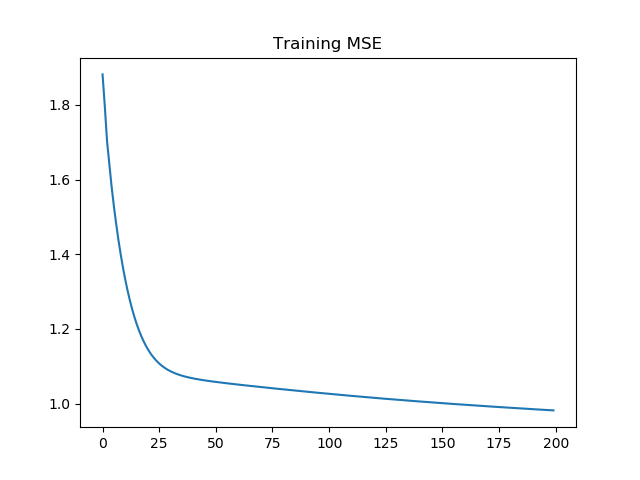

Text(0.5, 1.0, 'Training MSE')

In [17]:
##########################################################################
#training
##########################################################################
perc2 = MCPerceptron(num_of_cls, num_of_ins)
perc2.TrainIterative(X, dtrain, d, 0.004, 200)
Y = perc2.Forward(X)
#print('Y=',Y)
#print('X=',X)
predictions = perc2.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc2.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc2.w)
print('b=',perc2.b)
print()
print('Weights from matrix pseudo-inverse:') # just for comparison
print('w=',perc.w)
print('b=',perc.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

#### Try to tune the eta parameter of the iterative algorithm.

mse= 1.9820050161706433
classification_error= 100

mse= 1.7153737046156303
classification_error= 100

mse= 1.5733446614519804
classification_error= 100

mse= 1.5096922625666638
classification_error= 49

mse= 1.4554089659491607
classification_error= 50

mse= 1.4153566015398125
classification_error= 49

mse= 1.379483472354475
classification_error= 50

mse= 1.3475382697382419
classification_error= 50

mse= 1.3192872487169718
classification_error= 50

mse= 1.2934573409138395
classification_error= 50

mse= 1.2705648710520208
classification_error= 50

mse= 1.249752195505339
classification_error= 50

mse= 1.2312232083393189
classification_error= 50

mse= 1.2145069053090185
classification_error= 50

mse= 1.1995916464998586
classification_error= 50

mse= 1.186208102433812
classification_error= 50

mse= 1.1742629177639814
classification_error= 50

mse= 1.163579919114649
classification_error= 50

mse= 1.1540488377820064
classification_error= 50

mse= 1.145539348658623
classification_error= 50

ms


mse= 0.9613856471325044
classification_error= 23

mse= 0.9611126233439549
classification_error= 23

mse= 0.9608408569239968
classification_error= 23

mse= 0.9605703416220085
classification_error= 23

mse= 0.9603010712248635
classification_error= 23

mse= 0.9600330395603385
classification_error= 23

mse= 0.959766240500624
classification_error= 23

mse= 0.9595006679659404
classification_error= 23

mse= 0.9592363159282691
classification_error= 23

mse= 0.9589731784152051
classification_error= 23

mse= 0.9587112495139423
classification_error= 23

mse= 0.9584505233754014
classification_error= 23

mse= 0.9581909942185195
classification_error= 22

mse= 0.9579326563347101
classification_error= 22

mse= 0.9576755040925197
classification_error= 22

mse= 0.9574195319424927
classification_error= 22

mse= 0.9571647344222811
classification_error= 22

mse= 0.956911106162006
classification_error= 22

mse= 0.9566586418899218
classification_error= 22

mse= 0.9564073364383917
classification_error= 22

m

mse= 0.9253258190153975
classification_error= 22

mse= 0.9252243937738498
classification_error= 22

mse= 0.9251234391723389
classification_error= 22

mse= 0.9250229531432801
classification_error= 22

mse= 0.9249229336192453
classification_error= 22

mse= 0.9248233785329956
classification_error= 22

mse= 0.9247242858175264
classification_error= 22

mse= 0.9246256534061223
classification_error= 22

mse= 0.9245274792324228
classification_error= 22

mse= 0.9244297612304956
classification_error= 22

mse= 0.9243324973349225
classification_error= 22

mse= 0.9242356854808911
classification_error= 22

mse= 0.9241393236042995
classification_error= 22

mse= 0.9240434096418639
classification_error= 22

mse= 0.9239479415312398
classification_error= 22

mse= 0.9238529172111474
classification_error= 22

mse= 0.9237583346215041
classification_error= 22

mse= 0.9236641917035676
classification_error= 22

mse= 0.9235704864000801
classification_error= 22

mse= 0.9234772166554228
classification_error= 22



classification_error= 23

mse= 0.9056520527217987
classification_error= 23

mse= 0.9056367222598958
classification_error= 23

mse= 0.9056214508282051
classification_error= 23

mse= 0.9056062381672213
classification_error= 23

mse= 0.9055910840187047
classification_error= 23

mse= 0.9055759881256743
classification_error= 23

mse= 0.9055609502324024
classification_error= 23

mse= 0.9055459700844066
classification_error= 23

mse= 0.905531047428445
classification_error= 23

mse= 0.905516182012509
classification_error= 23

mse= 0.9055013735858165
classification_error= 23

mse= 0.9054866218988067
classification_error= 23

mse= 0.9054719267031331
classification_error= 23

mse= 0.9054572877516565
classification_error= 23

mse= 0.9054427047984407
classification_error= 23

mse= 0.9054281775987438
classification_error= 23

mse= 0.9054137059090146
classification_error= 23

mse= 0.9053992894868836
classification_error= 22

mse= 0.9053849280911596
classification_error= 22

mse= 0.9053706214818205
cl

<IPython.core.display.Javascript object>


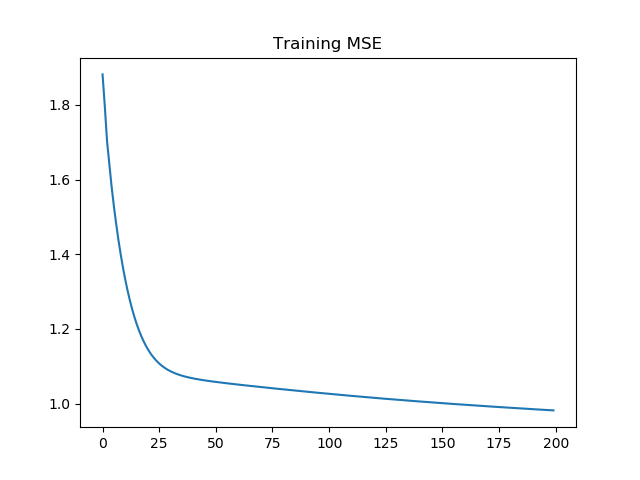

Text(0.5, 1.0, 'Training MSE')

In [18]:
##########################################################################
#training
##########################################################################
perc3 = MCPerceptron(num_of_cls, num_of_ins)
perc3.TrainIterative(X, dtrain, d, 0.004, 1000)
Y = perc3.Forward(X)
#print('Y=',Y)
predictions = perc3.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc3.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc3.w)
print('b=',perc3.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

#### Are the classes linearly separable (what you think? some of them?)

Watching the Prediction results we can see that Class 0 ("Iris-setosa") is linearly separable from the other ones, but Classes 1 and 2 ("Iris-versicolor" and "Iris-virginica") are not linearly separable (they are mixed).

#### What are the min/max values of the inputs? Try to normalize the data. Does it help?

In [19]:
min_norm = X.min(axis=0)
max_norm = X.max(axis=0)

print("BEFORE NORMALIZATION")
print("The minimum and maximum values (for every row) are:")
print("min =", min)
print("max =", max)

print()

print("AFTER NORMALIZATION")
print("The minimum and maximum values (for every row) are:")
print("min (normalized) =", min_norm)
print("max (normalized) =", max_norm)


BEFORE NORMALIZATION
The minimum and maximum values (for every row) are:
min = [4.3 2.  1.  0.1]
max = [7.9 4.4 6.9 2.5]

AFTER NORMALIZATION
The minimum and maximum values (for every row) are:
min (normalized) = [0.5443038  0.45454545 0.14492754 0.04      ]
max (normalized) = [1. 1. 1. 1.]


When testing we can observe that without normalizing the data, the update rule behaves incorrectly and we get strange results.